# Task 1 - Equation and Agent-based modelling

## Part 2 - Equation Based Modelling

In [122]:
import numpy as np
import matplotlib.pyplot as plt
# agent based imports
from ecolab3.environment import Environment
from ecolab3.agents import Rabbit, Fox
from ecolab3.__init__ import run_ecolab, draw_animation, get_agent_counts

class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*f(self.x,self.t)
            self.x=self.x+dt*f(x_mp,self.t+dt/2)
            
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T




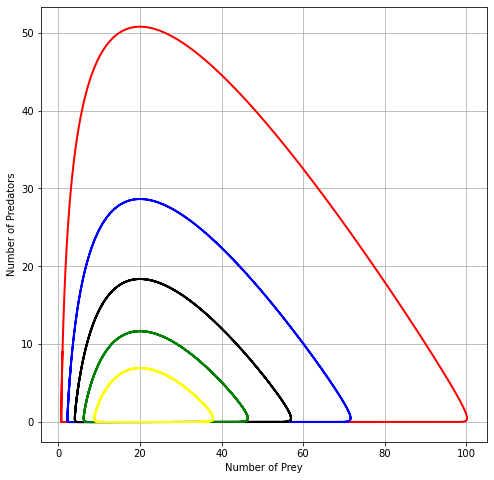

In [123]:
# different starting points [num_rabbits,num_foxes]
xs = [[1,9],[3,7],[5,5],[7,3],[9,1]]
# colours to show different solutions
colours = ['red','blue','black','green','yellow']

# Lotka-Volterra as a function
def f(x,t):
    alpha=0.01
    beta=0.02
    gamma=0.4
    delta=0.02
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[0]*(alpha-beta*x[1])
    z[1]=x[1]*(delta*x[0]-gamma)
    
    return z

# Simulating the system
'''
    xs: The different initial conditions that are to be simulated
    colours: the colours for each solution (one for every initial condition)
    N: the number of initial conditions that will be simulated
'''
def full_process(xs,colours,N):
        fig, ax = plt.subplots(figsize=(8, 8))
        for i in range(N):
            NM=Numerical_methods(f)         
            dt=0.01                          
            N_iter=int(1000/dt)               

            X_mp=np.zeros([2,N_iter])
            x_start= xs[i]
            t_start=0

            NM.Initialise(x_start,t_start)
            # MidPoint method chosen - can change to any other method
            X_mp,ts=NM.MidPoint(dt,N_iter)
            plt.xlabel('Number of Prey')
            plt.ylabel('Number of Predators');
            plt.grid(True)
            plt.plot(X_mp[0,:],X_mp[1,:],color=colours[i],linewidth=2)
            
full_process(xs,colours,len(xs))

## Part 3 - Agent Based Simulation


In [124]:
# Running numerical method example
NM=Numerical_methods(f)         
dt=0.01                          
N_iter=int(1000/dt)               

X_mp=np.zeros([2,N_iter])
x_start= [10,10]
t_start=0

NM.Initialise(x_start,t_start)
X_mp,ts=NM.MidPoint(dt,N_iter)
times = list(np.arange(N_iter)*0.01)

In [136]:
#create default environment
env = Environment(shape=[60,60],growrate=60,maxgrass=5,startgrass=1)
    
#create agents (rabbits and foxes)
Nrabbits = 10
Nfoxes = 10
agents = []
for i in range(Nrabbits):
    r = Rabbit(position=env.get_random_location(),speed=1)
    agents.append(r)
for i in range(Nfoxes):
    f = Fox(position=env.get_random_location(),speed=3)
    agents.append(f)

In [137]:
# running agent based example
record = run_ecolab(env,agents,Niterations=1000)

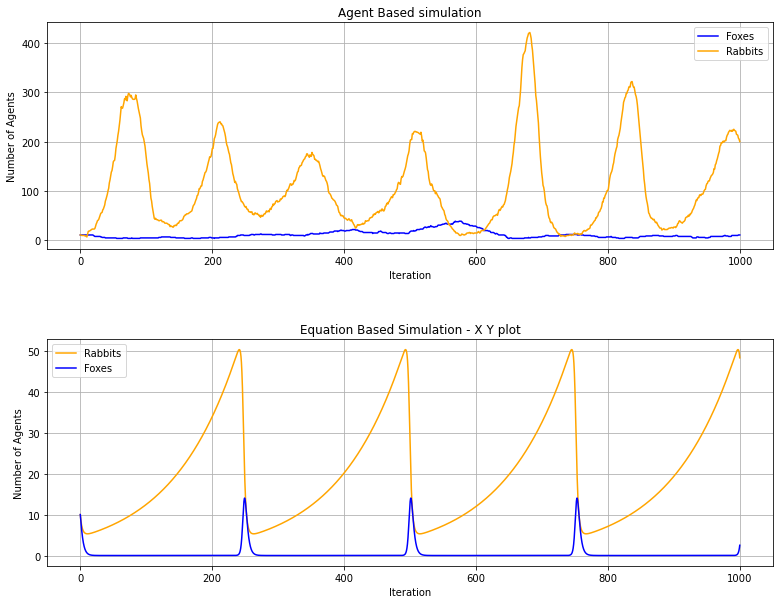

In [138]:

# Plotting both agent based and numerical examples
fig, (ax1, ax2) = plt.subplots(2,figsize=(13, 10))
plt.subplots_adjust(hspace=0.4)

# Plot the agent based results for starting point 10,10
counts = get_agent_counts(record)
ax1.plot(counts[:,0],color='blue',label='Foxes')
ax1.plot(counts[:,1],color='orange',label='Rabbits')
ax1.legend()
ax1.grid()
ax1.set_ylabel('Number of Agents')
ax1.set_xlabel('Iteration')
ax1.title.set_text("Agent Based simulation")

# plot the numerical methods results for starting point 10,10
ax2.plot(ts,X_mp[0,:],color='orange', label='Rabbits')
ax2.plot(ts,X_mp[1,:],color='blue', label='Foxes')
ax2.legend()
ax2.grid()
ax2.set_ylabel('Number of Agents')
ax2.set_xlabel('Iteration')
ax2.title.set_text("Equation Based Simulation - X Y plot")

### Differences between equation based modelling and agent based modelling
The Lotka-Volterra model is quite simple and assumes that the only things affecting the population of the rabbits and foxes are:
- Repoduction rate of rabbits $\alpha x$
- Predation (consumption of prey), which leads to an increase in the population of foxes $\delta yx$ (gain more nutrients for repoduction) and a decrease in the population of rabbits (death) $\beta xy$
- The starvation/death of foxes $\gamma y$

As shown in the plots above, the equation based model continously oscillates because as the number of rabbits increase (upto a maximum) the number of foxes also increases since there are now more rabbits per fox for consumption. When the number of foxes increase the number of rabbits decrease because they are being consumed at a higher rate. When the number of foxes reaches some maxium, it decreases since the number of rabbits per fox is small and $\gamma y$ is quite high so foxes die at a higher rate causing the number of foxes to decrease and number of rabbits, in turn to increase. This loop is then repeated. This loop is shown in the phase plot.

This behaviour is different to the agent based model because the agent based model includes other factors that can affect the population of rabbits and foxes. Previously the population of foxes depended on the population of rabbits and vice versa, the agent based model however takes into account the age and lack of food for death (also if eaten for the rabbit). It also takes into account the frequency wich agents are allowed to reproduce and the amounts of nutrients required for reproduction. These small details are what causes the oscillations to not be equal and for the frequency of oscillations to differ. For example, large peaks in the rabbit population are due to rabbits being able to reproduce 3x faster than foxes and only being required to have half as much nutrients for reproduction as the foxes. One other main thing that causes the oscillations to not be equal is that the agent based model is able to simulate interaction between indivuidual agents, so now the death of a single rabbit is based on the vision, distance and speed of the closest fox. Also the movements of agents is random so the time it takes for each fox to be able to locate the closes rabbit will be different, also causing the oscillations to be different.



## Part 4 - Effects of speed in Agent based Modelling

In [118]:
#create default environment
env = Environment(shape=[45,45],growrate=60,maxgrass=5,startgrass=1)
    
#create agents (rabbits and foxes)
Nrabbits = 10
Nfoxes = 10


# Running simulation for when the speed of fox is faster - 5
agents = []
for i in range(Nrabbits):
    r = Rabbit(position=env.get_random_location(),speed=1)
    agents.append(r)
for i in range(Nfoxes):
    f = Fox(position=env.get_random_location(),speed=5)
    agents.append(f)

# running agent based example
record = run_ecolab(env,agents,Niterations=1000)
counts_5 = get_agent_counts(record)

    
# Running simulation for when the speed of fox is faster - 7
agents = []
for i in range(Nrabbits):
    r = Rabbit(position=env.get_random_location(),speed=1)
    agents.append(r)
for i in range(Nfoxes):
    f = Fox(position=env.get_random_location(),speed=7)
    agents.append(f)

# running agent based example
record = run_ecolab(env,agents,Niterations=1000)
counts_7 = get_agent_counts(record)

# Running simulation when speed is equal
agents = []
for i in range(Nrabbits):
    r = Rabbit(position=env.get_random_location(),speed=3)
    agents.append(r)
for i in range(Nfoxes):
    f = Fox(position=env.get_random_location(),speed=3)
    agents.append(f)
    
# running agent based example
record = run_ecolab(env,agents,Niterations=1000)
counts_default = get_agent_counts(record)


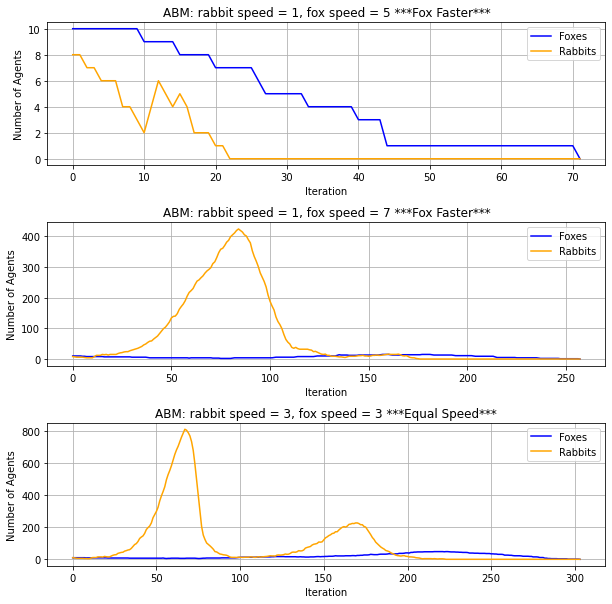

In [119]:
# Plot agent based results when speed is changed
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)


# Plotting results for faster fox 
ax1.plot(counts_5[:,0],color='blue',label='Foxes')
ax1.plot(counts_5[:,1],color='orange',label='Rabbits')
ax1.legend()
ax1.grid()
ax1.set_ylabel('Number of Agents')
ax1.set_xlabel('Iteration')
ax1.title.set_text("ABM: rabbit speed = 1, fox speed = 5 ***Fox Faster***")

# Plotting results for faster rabbit
ax2.plot(counts_7[:,0],color='blue',label='Foxes')
ax2.plot(counts_7[:,1],color='orange',label='Rabbits')
ax2.legend()
ax2.grid()
ax2.set_ylabel('Number of Agents')
ax2.set_xlabel('Iteration')
ax2.title.set_text("ABM: rabbit speed = 1, fox speed = 7 ***Fox Faster***")

# plot ABM results for equal speed
ax3.plot(counts_default[:,0],color='blue',label='Foxes')
ax3.plot(counts_default[:,1],color='orange',label='Rabbits')
ax3.legend()
ax3.grid()
ax3.set_ylabel('Number of Agents')
ax3.set_xlabel('Iteration')
ax3.title.set_text("ABM: rabbit speed = 3, fox speed = 3 ***Equal Speed***")


The parameter speed was varied for predator and prey. Increasing speed for predator from 2 to 5/7, resulted in predators preying on the prey quicker. Two types of behaviours were observed graphically. In the first case, the population of prey would dwindle down to extinction within 100 iterations and as predators no longer have food, they would reach extinction almost at the same time. In the second case, the population of preys would initially decline to almost extinction and as a result of having less food predators population goes down significantly. As the predators population would near extinction, the preys population would skyrocket to over 250 in most cases and. As the number of preys skyrocketed, the population of predators also increased to around 40-50 in most cases causing the prey population to plummet to extinction in most cases and shortly followed by predators as well. In some cases, they would repeat this behaviour several more times before both reached extinction.

Increasing speed of preys from 1 usually resulted in multiple spikes in their population and gradual peaks for the predators. Interestingly the results were straightforward, in almost all cases both would reach extinction significantly faster with preys reaching extinction significantly faster than predators. Even though the rabbits were faster than the predators as their population spiked, it caused predators to increase their numbers by a large amount which in turn would cause preys to plummet after which the predators would slowly decline and then this behaviour would be repeated several times depending on how fast the preys were than the predators after which both would reach extinction as mentioned previously. 

Lastly, increasing speed for both at the same time produces results previously mentioned. Speed for prey and predator 1 and 3 respectively produced the best results as both species thrived the longest compared to other speed values.